In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys

import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [2]:
# import darkhistory
if os.environ['USER'] == 'yitians' and 'submit' in os.uname().nodename:
    os.environ['DH_DIR'] = '/work/submit/yitians/darkhistory/DarkHistory'
    os.environ['DM21CM_DATA_DIR'] = '/data/submit/yitians/DM21cm'
sys.path.append(os.environ['DH_DIR'])
# import DM21cm
sys.path.append('..')

In [3]:
import darkhistory.physics as phys
import darkhistory.history.tla as tla

### 1. Standard Ionization and Temperature Histories with Helium

In [4]:
rs_vec = np.flipud(np.arange(1., 3000., 0.1))
soln_no_He = tla.get_history(rs_vec)
soln_with_He = tla.get_history(rs_vec, helium_TLA=True)

Tm = soln_no_He[:,0]/phys.kB
xe_no_He   = soln_no_He[:,1]
# The other columns with xHeII and xHeIII are negligible.
xe_with_He = soln_with_He[:,1] + soln_with_He[:,2]
#The last column with xHeIII is negligible

### 2. Reionization

In [5]:
soln_default_reion = tla.get_history(rs_vec, helium_TLA=True, reion_switch=True)

### 3. Reionization + Dark Matter

In [12]:
%autoreload
rs_vec_DM = np.flipud(np.arange(4, 3000., 0.1))

soln_DM = tla.get_history(
    rs_vec_DM, baseline_f = True,
    inj_particle = 'elec', DM_process = 'decay',
    mDM=1e8, lifetime = 3e25,
    reion_switch=False,
    helium_TLA=False
)

In [7]:
rs_vec_DM = np.flipud(np.arange(4, 3000., 0.1))

soln_DM_reion = tla.get_history(
    rs_vec_DM, baseline_f = True,
    inj_particle = 'elec', DM_process = 'decay',
    mDM=1e8, lifetime = 3e25,
    reion_switch=True,
    helium_TLA=True
)

In [10]:
%autoreload 2

import main

soln_DM_BR = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e25, primary='elec_delta',
    start_rs = 3000, use_tqdm=False,
    coarsen_factor=32, backreaction=True
)

soln_DM_reion_BR = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e25, primary='elec_delta',
    start_rs = 3000, use_tqdm=False,
    coarsen_factor=12, backreaction=True, helium_TLA=True, reion_switch=True
)

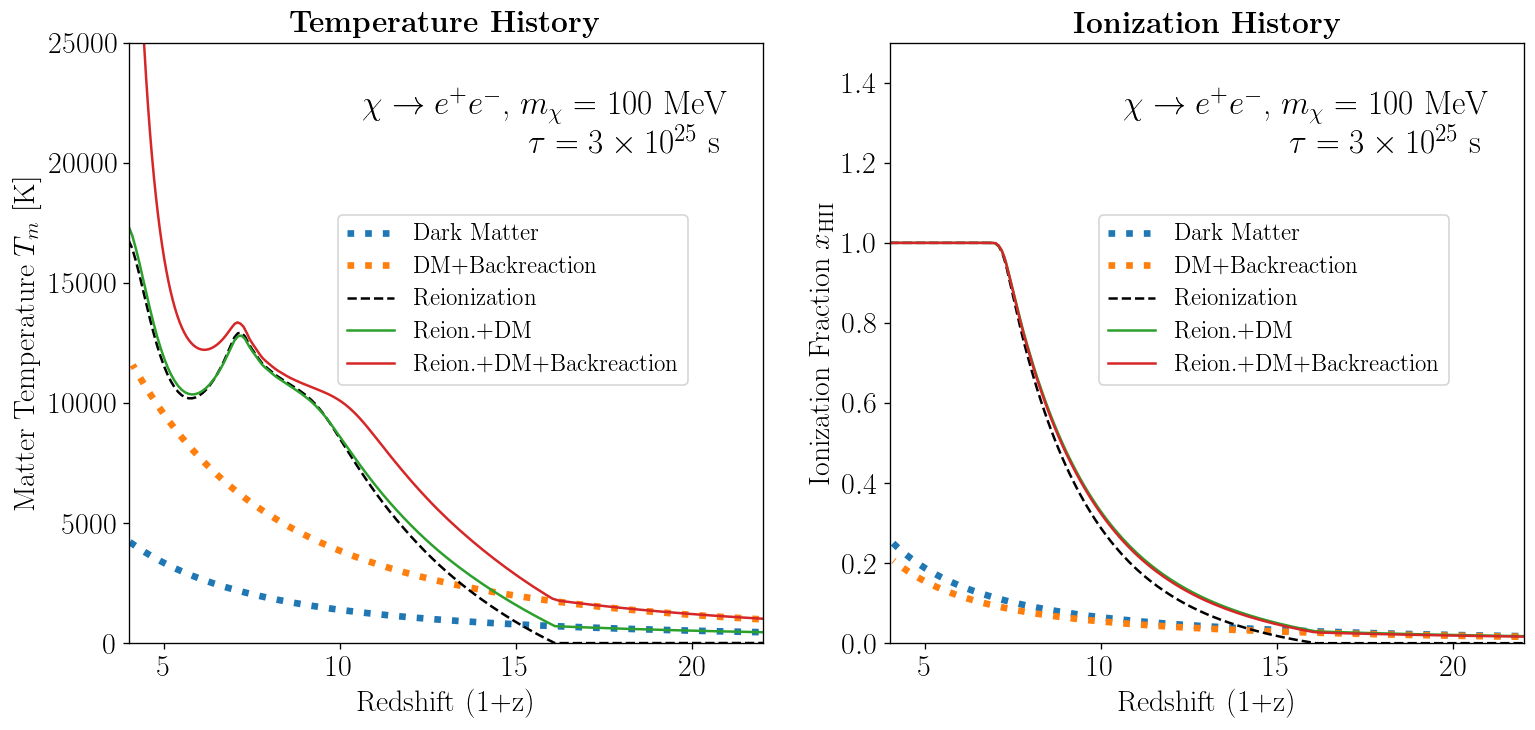

In [13]:
# DM, no reionization, no backreaction.
Tm_DM   = soln_DM[:,0]/phys.kB
xHII_DM = soln_DM[:,1]

# DM, no reionization, with backreaction.
rs_vec_BR  = soln_DM_BR['rs']
Tm_DM_BR   = soln_DM_BR['Tm']/phys.kB
xHII_DM_BR = soln_DM_BR['x'][:,0]

# DM, reionization, no backreaction.
Tm_DM_reion = soln_DM_reion[:,0]/phys.kB
xHII_DM_reion = soln_DM_reion[:,1]

# DM, reionization, with backreaction.
rs_vec_DM_reion_BR = soln_DM_reion_BR['rs']
Tm_DM_reion_BR     = soln_DM_reion_BR['Tm']/phys.kB
xHII_DM_reion_BR   = soln_DM_reion_BR['x'][:,0]

fig_reion=plt.figure(figsize=(15,6.5))

ax = plt.subplot(1,2,1)

plt_Tm_DM,          = plt.plot(rs_vec_DM, Tm_DM, ':', linewidth=4, label='Dark Matter')
plt_Tm_DM_BR,       = plt.plot(rs_vec_BR, Tm_DM_BR, ':', linewidth=4, label='DM+Backreaction')
plt_Tm_reion,       = plt.plot(rs_vec, soln_default_reion[:,0]/phys.kB, 'k--', label='Reionization')
plt_Tm_DM_reion,    = plt.plot(rs_vec_DM, Tm_DM_reion, label='Reion.+DM')
plt_Tm_DM_reion_BR, = plt.plot(rs_vec_DM_reion_BR, Tm_DM_reion_BR, label='Reion.+DM+Backreaction')

# Text
plt.text(0.37, 0.88, r'$\chi \to e^+e^-$, $m_\chi$ = 100 MeV', fontsize=20, transform=ax.transAxes) 
plt.text(0.63, 0.82, r'$\tau = 3 \times 10^{25}$ s', fontsize=20, transform=ax.transAxes)

leg = plt.legend(handles=[plt_Tm_DM, plt_Tm_DM_BR, plt_Tm_reion, plt_Tm_DM_reion, plt_Tm_DM_reion_BR], loc=(0.33, 0.43))


plt.title(r'\bf{Temperature History}')
plt.xlabel('Redshift (1+z)')
plt.ylabel('Matter Temperature $T_m$ [K]')
plt.axis([4, 22, 0, 25000])

ax = plt.subplot(1,2,2)

plt_xHII_DM,          = plt.plot(rs_vec_DM, xHII_DM, ':', linewidth=4, label='Dark Matter')
plt_xHII_DM_BR,       = plt.plot(rs_vec_BR, xHII_DM_BR, ':', linewidth=4, label='DM+Backreaction')
plt_xHII_reion,       = plt.plot(rs_vec, soln_default_reion[:,1], 'k--', label='Reionization')
plt_xHII_DM_reion,    = plt.plot(rs_vec_DM, xHII_DM_reion, label=r'Reion.+DM')
plt_xHII_DM_reion_BR, = plt.plot(rs_vec_DM_reion_BR, xHII_DM_reion_BR, label='Reion.+DM+Backreaction')

# Text
plt.text(0.37, 0.88, r'$\chi \to e^+e^-$, $m_\chi$ = 100 MeV', fontsize=20, transform=ax.transAxes) 
plt.text(0.63, 0.82, r'$\tau = 3 \times 10^{25}$ s', fontsize=20, transform=ax.transAxes)

leg = plt.legend(handles=[plt_xHII_DM, plt_xHII_DM_BR, plt_xHII_reion, plt_xHII_DM_reion, plt_xHII_DM_reion_BR], loc=(0.33, 0.43))

plt.title(r'\bf{Ionization History}')
plt.xlabel('Redshift (1+z)')
plt.ylabel(r'Ionization Fraction $x_\mathrm{HII}$')
plt.axis([4, 22, 0, 1.5]);

## Bibliography

[1]<a id='cite_rates1'></a> Ewald Puchwein, Francesco Haardt, Martin G. Haehnelt, and Piero Madau, “Consistent modelling of the meta-galactic UV background and the thermal/ionization history of the intergalactic medium,” (2018), arXiv:1801.04931 [astro-ph.GA]

[2]<a id='cite_rates2'></a> James S. Bolton and Martin G. Haehnelt, “The nature and evolution of the highly ionized near-zones in the absorption spectra of z =6 quasars,” Mon. Not. Roy. Astron. Soc. 374, 493–514 (2007), arXiv:astro-ph/0607331 [astro-ph].

[3]<a id='cite_rates3'></a> James S. Bolton and Martin G. Haehnelt, “The nature and evolution of the highly ionized near-zones in the absorption spectra of z =6 quasars,” Mon. Not. Roy. Astron. Soc. 374, 493–514 (2007), arXiv:astro-ph/0607331 [astro-ph].

[4]<a id='cite_tanh'></a> Antony Lewis, “Cosmological parameters from WMAP 5-year temperature maps,” Phys. Rev. D78, 023002 (2008), arXiv:0804.3865 [astro-ph].